In [1]:
!python --version

Python 3.11.5


In [2]:
# matplotlib
!pip install seaborn

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [3]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='dark')

In [5]:
import pickle

with open('df_player_stats.pkl', 'rb') as pkl_file:
    df_player_stats = pickle.load(pkl_file)

In [6]:
df_player_stats.head(3)

,player_id,player_name,player_link,player_teams,player_maps,player_rounds,player_kd_diff,player_kd,player_rating,player_realname,player_flag,player_age,player_yob,stat_hs_pct,stat_adr,stat_kills,stat_deaths,stat_kills_round,stat_assists_round,stat_deaths_round
0,11893,ZywOo,https://www.hltv.org/stats/players/11893/zywoo?matchType=Majors,[Vitality],93,2481,493,1.33,1.21,Mathieu Herbaut,France,23.0,2001.0,37.2,81.9,1981,1488,0.80,0.12,0.60
1,9216,coldzera,https://www.hltv.org/stats/players/9216/coldzera?matchType=Majors,"[SK, MIBR, Luminosity]",84,2229,449,1.33,1.21,Marcelo David,Brazil,29.0,1995.0,44.6,82.9,1807,1358,0.81,0.12,0.61
2,7998,s1mple,https://www.hltv.org/stats/players/7998/s1mple?matchType=Majors,"[Natus Vincere, Liquid]",115,3001,595,1.32,1.20,Oleksandr Kostyliev,Ukraine,27.0,1997.0,39.4,83.1,2444,1849,0.81,0.10,0.62


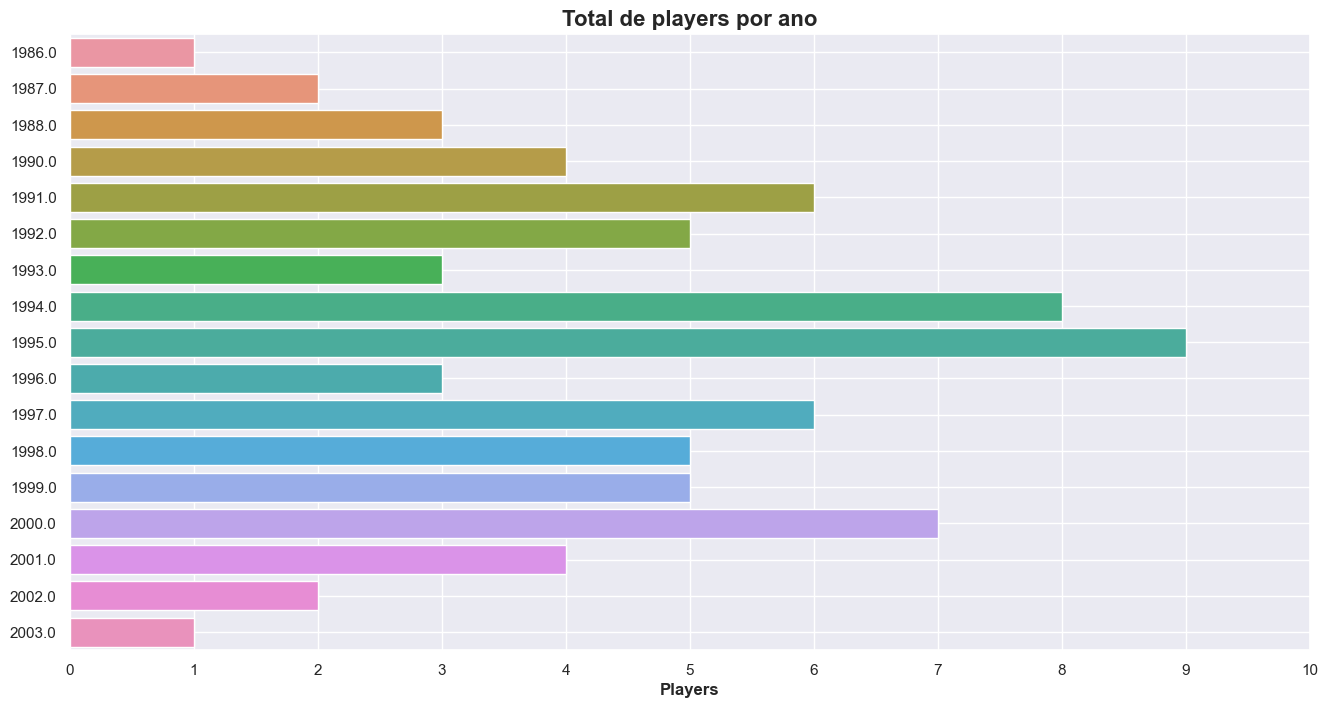

In [7]:
plt.figure(figsize=(16, 8))

# value_counts
sns.countplot(df_player_stats,
              y='player_yob', orient='y')

plt.xticks(ticks=range(0, 11, 1))
plt.ylabel('')
plt.xlabel('Players', fontsize=12, fontweight='bold')
plt.title('Total de players por ano', fontsize=16, fontweight='bold')

plt.grid()
plt.show()

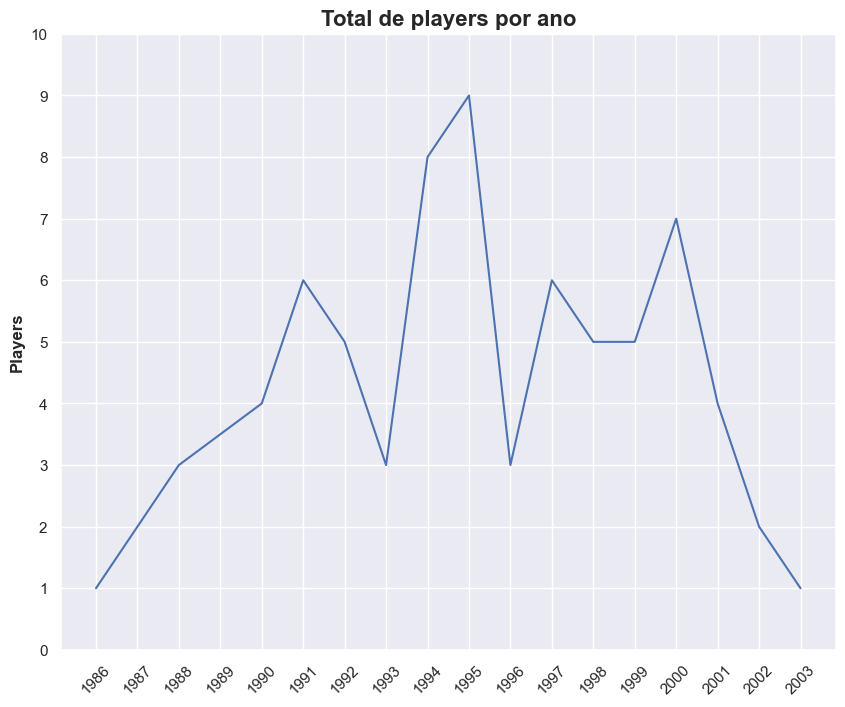

In [8]:
plt.figure(figsize=(10, 8))

df_view = df_player_stats.value_counts(subset=['player_yob']) \
    .to_frame().reset_index()

sns.lineplot(df_view, x='player_yob', y='count')

plt.xticks(ticks=range(1986, 2004, 1), rotation=45)
plt.yticks(ticks=range(0, 11, 1))
plt.xlabel('')
plt.ylabel('Players', fontsize=12, fontweight='bold')
plt.title('Total de players por ano', fontsize=16, fontweight='bold')

plt.grid()
plt.show()

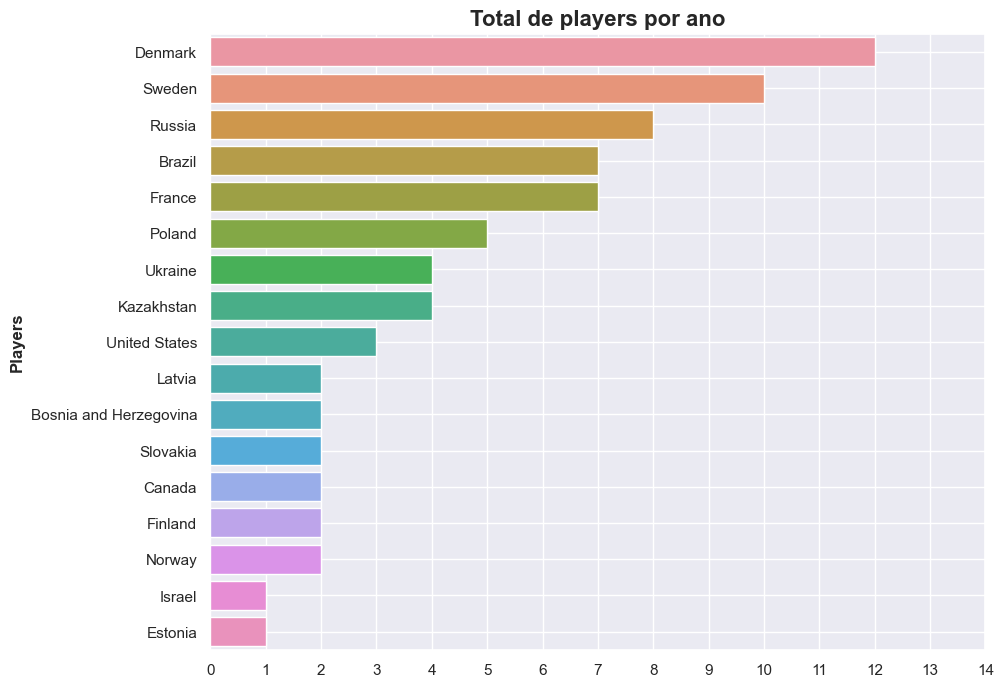

In [9]:
plt.figure(figsize=(10, 8))

order = df_player_stats['player_flag'].value_counts(ascending=False).index

colors = ['crimson' if i < 5 else 'blue' for i in range(len(order))]

# palette=colors,
sns.countplot(df_player_stats,
              y='player_flag', orient='y',
              order=order)

plt.xticks(ticks=range(0, 15, 1))
plt.xlabel('')
plt.ylabel('Players', fontsize=12, fontweight='bold')
plt.title('Total de players por ano', fontsize=16, fontweight='bold')

plt.grid()
plt.show()

In [17]:
df_view.pivot_table(values='count', index='player_flag', columns='player_yob', fill_value=0, aggfunc='sum')

player_yob,1986.0,1987.0,1988.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0
player_flag,,,,,,,,,,,,,,,,,
Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
Brazil,0,0,0,0,1,1,0,0,2,1,0,0,1,1,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
Denmark,0,0,0,2,0,0,1,0,4,0,0,1,1,1,1,1,0
Estonia,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Finland,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
France,0,0,0,0,0,2,1,2,1,0,0,0,0,0,1,0,0
Israel,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Kazakhstan,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0


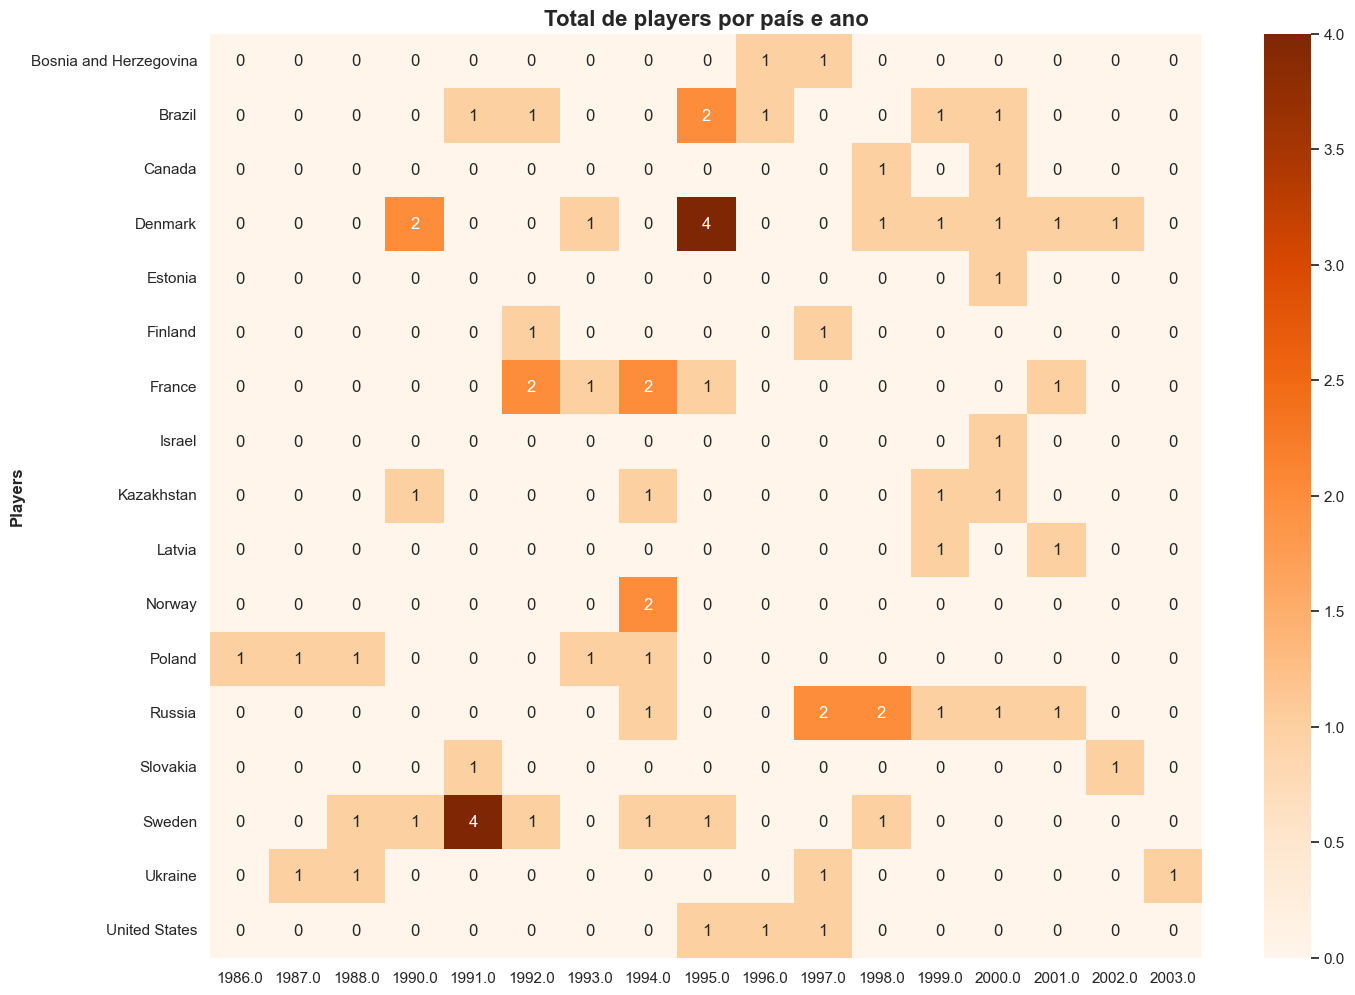

In [11]:
df_view = df_player_stats.value_counts(subset=['player_yob', 'player_flag']).to_frame().reset_index()

heatmap_data = df_view.pivot_table(values='count', index='player_flag', columns='player_yob', fill_value=0, aggfunc='sum')

plt.figure(figsize=(16, 12))

sns.heatmap(heatmap_data, annot=True, cmap="Oranges", fmt='d', linewidths=0)

plt.xlabel('')
plt.ylabel('Players', fontsize=12, fontweight='bold')
plt.title('Total de players por país e ano', fontsize=16, fontweight='bold')

plt.grid()
plt.show()

In [12]:
df_player_stats.head(3)

,player_id,player_name,player_link,player_teams,player_maps,player_rounds,player_kd_diff,player_kd,player_rating,player_realname,player_flag,player_age,player_yob,stat_hs_pct,stat_adr,stat_kills,stat_deaths,stat_kills_round,stat_assists_round,stat_deaths_round
0,11893,ZywOo,https://www.hltv.org/stats/players/11893/zywoo?matchType=Majors,[Vitality],93,2481,493,1.33,1.21,Mathieu Herbaut,France,23.0,2001.0,37.2,81.9,1981,1488,0.80,0.12,0.60
1,9216,coldzera,https://www.hltv.org/stats/players/9216/coldzera?matchType=Majors,"[SK, MIBR, Luminosity]",84,2229,449,1.33,1.21,Marcelo David,Brazil,29.0,1995.0,44.6,82.9,1807,1358,0.81,0.12,0.61
2,7998,s1mple,https://www.hltv.org/stats/players/7998/s1mple?matchType=Majors,"[Natus Vincere, Liquid]",115,3001,595,1.32,1.20,Oleksandr Kostyliev,Ukraine,27.0,1997.0,39.4,83.1,2444,1849,0.81,0.10,0.62


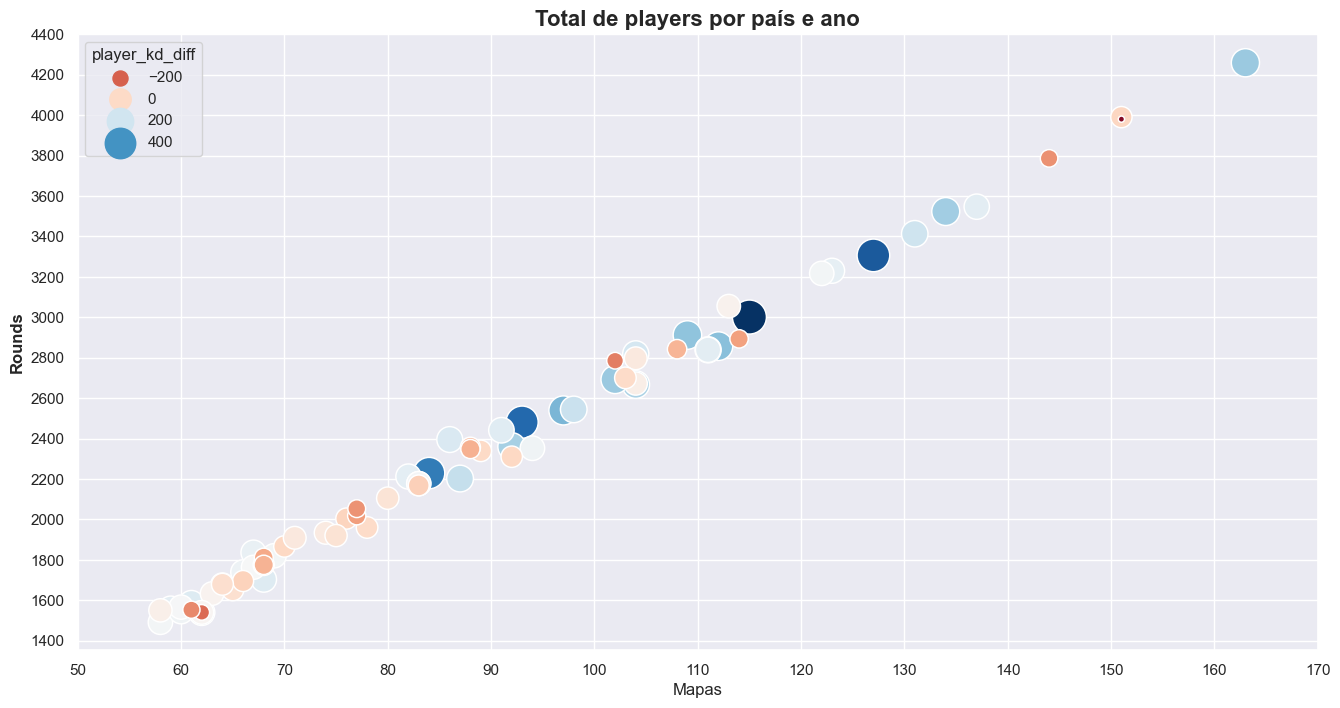

In [13]:
plt.figure(figsize=(16, 8))

sns.scatterplot(df_player_stats, x='player_maps', y='player_rounds',
                hue='player_kd_diff', palette='RdBu',
                size='player_kd_diff', hue_norm=(-400, 600), sizes=(20, 600))

plt.xticks(ticks=range(50, 180, 10))
plt.yticks(ticks=range(1400, 4600, 200))
plt.xlabel('Mapas')
plt.ylabel('Rounds', fontsize=12, fontweight='bold')
plt.title('Total de players por país e ano', fontsize=16, fontweight='bold')

plt.grid()
plt.show()

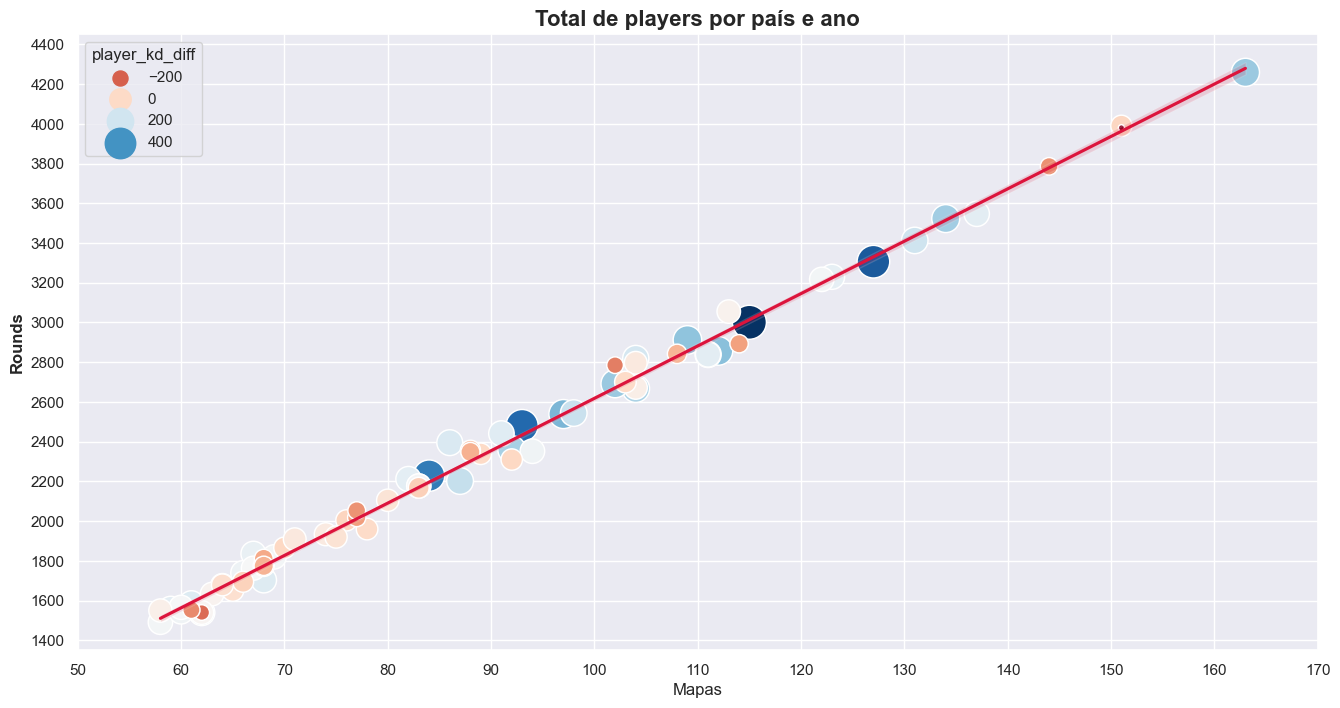

In [14]:
plt.figure(figsize=(16, 8))

sns.scatterplot(df_player_stats, x='player_maps', y='player_rounds',
                hue='player_kd_diff', palette='RdBu',
                size='player_kd_diff', hue_norm=(-400, 600), sizes=(20, 600))

# regression (regressão logística)
sns.regplot(df_player_stats, x='player_maps', y='player_rounds', scatter=False, color='crimson')

plt.xticks(ticks=range(50, 180, 10))
plt.yticks(ticks=range(1400, 4600, 200))
plt.xlabel('Mapas')
plt.ylabel('Rounds', fontsize=12, fontweight='bold')
plt.title('Total de players por país e ano', fontsize=16, fontweight='bold')

plt.grid()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


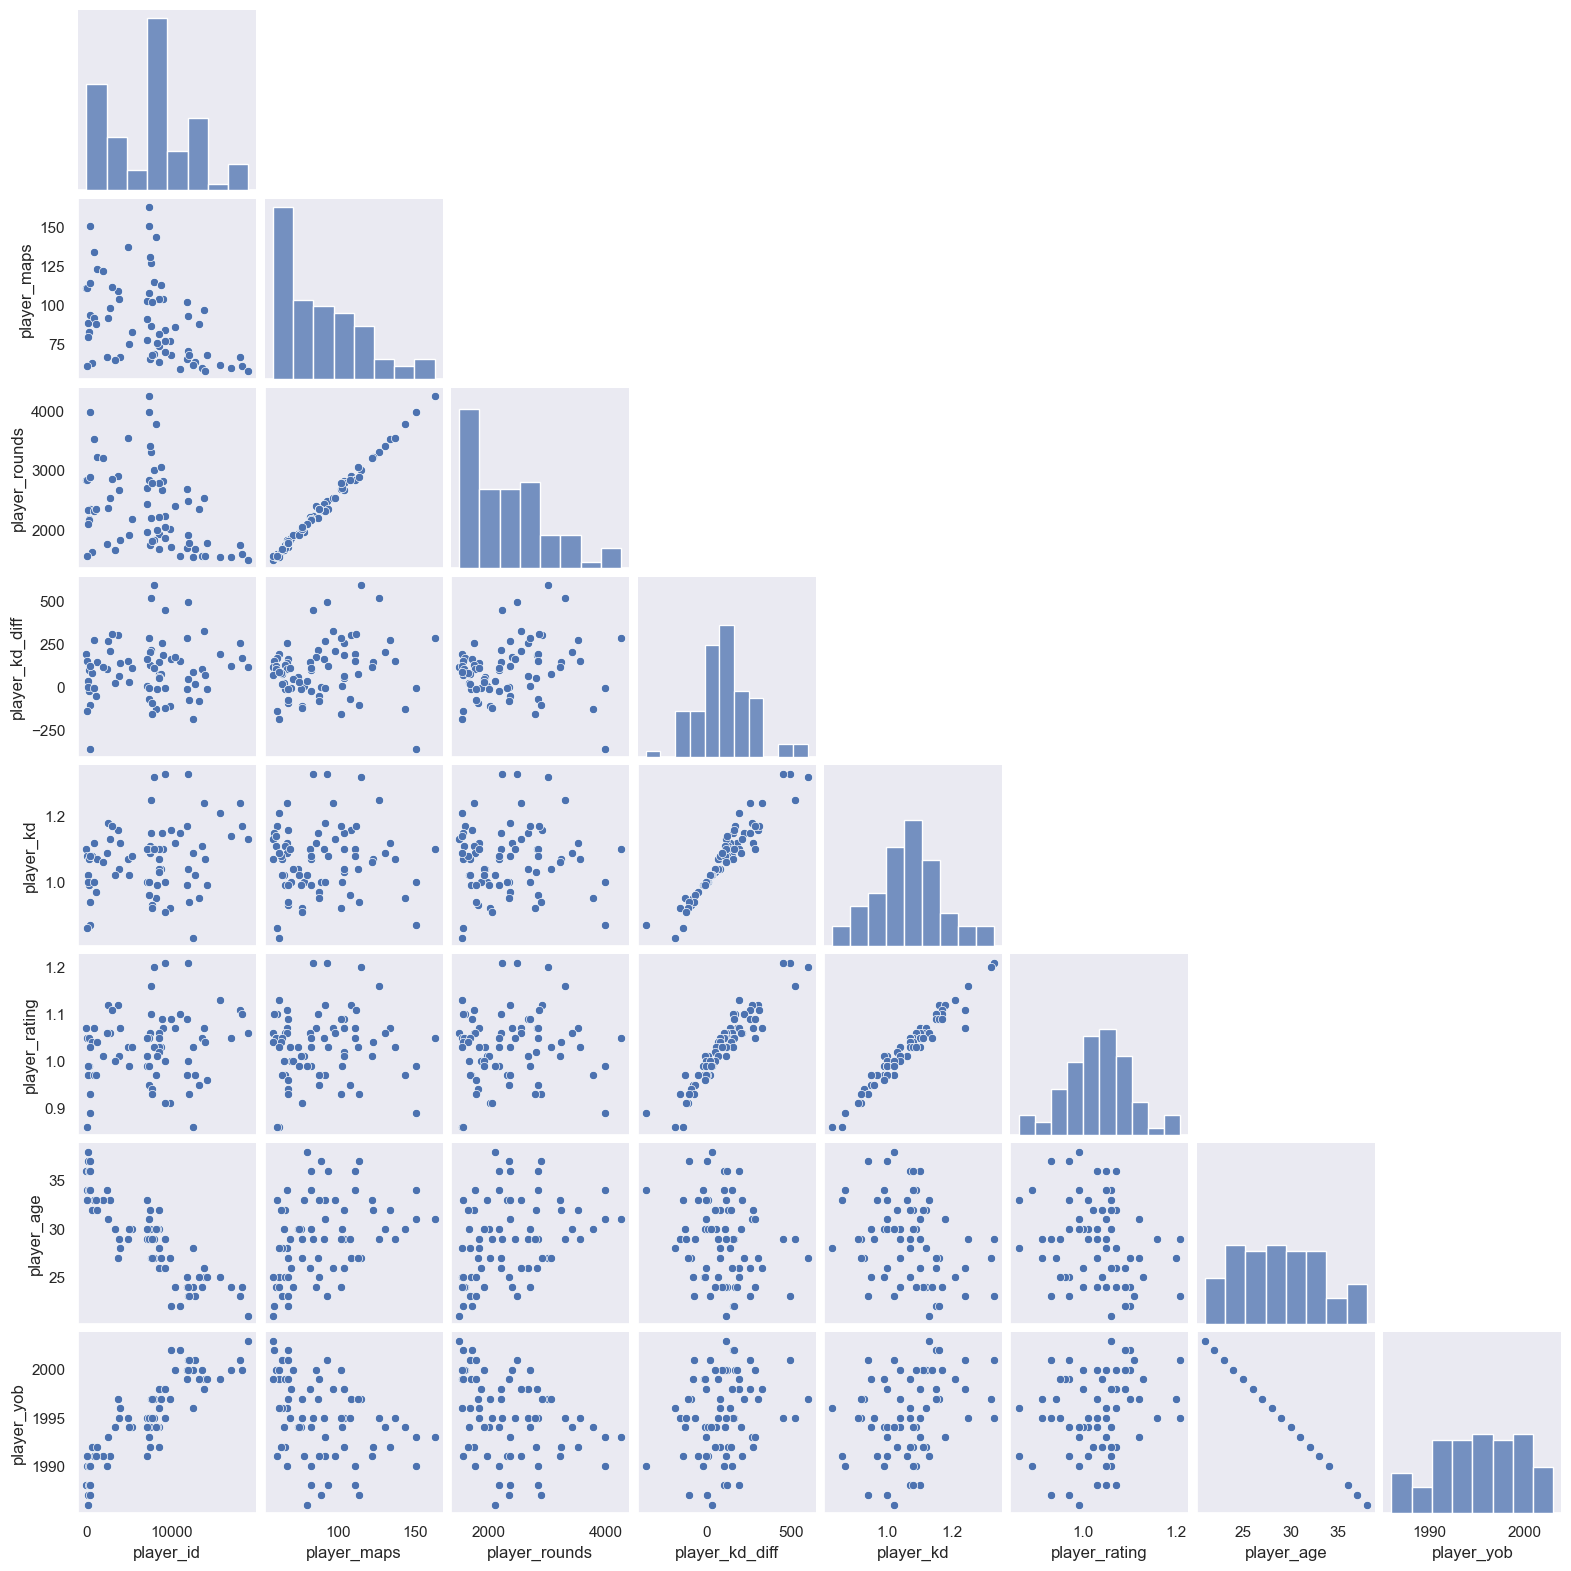

In [15]:
sns.pairplot(df_player_stats, corner=True, height=2.0)